## Telecom Churn Case Study

## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [ ]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# For displaying all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Importing dataset
TelecomDF = pd.read_csv('telecom_churn_data.csv')
TelecomDF.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Checking shape of dataset
TelecomDF.shape

(99999, 226)

In [5]:
# Checking summary of dataset
TelecomDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
# Checking statistical summary of dataset
TelecomDF.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [7]:
# Checking null count
round(TelecomDF.isnull().sum()/len(TelecomDF.index),2).sort_values(ascending=False)

max_rech_data_6             0.75
count_rech_3g_6             0.75
av_rech_amt_data_6          0.75
date_of_last_rech_data_6    0.75
arpu_3g_6                   0.75
fb_user_6                   0.75
count_rech_2g_6             0.75
night_pck_user_6            0.75
arpu_2g_6                   0.75
total_rech_data_6           0.75
arpu_3g_8                   0.74
arpu_3g_7                   0.74
total_rech_data_7           0.74
arpu_3g_9                   0.74
date_of_last_rech_data_7    0.74
date_of_last_rech_data_8    0.74
date_of_last_rech_data_9    0.74
total_rech_data_9           0.74
total_rech_data_8           0.74
av_rech_amt_data_9          0.74
arpu_2g_7                   0.74
av_rech_amt_data_7          0.74
count_rech_3g_9             0.74
count_rech_3g_8             0.74
count_rech_3g_7             0.74
count_rech_2g_9             0.74
count_rech_2g_8             0.74
count_rech_2g_7             0.74
max_rech_data_9             0.74
max_rech_data_8             0.74
av_rech_am

Null values exist in various columns.

### Data Cleaning

In [8]:
# Treating categorical columns
# Picking up columns which are based on scheme whether to avail or not
print(TelecomDF['night_pck_user_6'].value_counts(),'\n')
print(TelecomDF['night_pck_user_7'].value_counts(),'\n')
print(TelecomDF['night_pck_user_8'].value_counts(),'\n')
print(TelecomDF['night_pck_user_9'].value_counts(),'\n')
print(TelecomDF['fb_user_6'].value_counts(),'\n')
print(TelecomDF['fb_user_7'].value_counts(),'\n')
print(TelecomDF['fb_user_8'].value_counts(),'\n')
print(TelecomDF['fb_user_9'].value_counts(),'\n')

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64 

0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64 

0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64 

0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64 

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64 

1.0    23238
0.0     2333
Name: fb_user_7, dtype: int64 

1.0    23463
0.0     2876
Name: fb_user_8, dtype: int64 

1.0    22318
0.0     3604
Name: fb_user_9, dtype: int64 



In [9]:
# Imputing missing values with '-1' in above columns where -1 would be a new category
categorical_cols = ["night_pck_user_6", "night_pck_user_7", "night_pck_user_8", "night_pck_user_9", 
                    "fb_user_6", "fb_user_7", "fb_user_8", "fb_user_9"]

for col in categorical_cols:
    TelecomDF[col].fillna(value=-1, inplace=True)

In [10]:
# Checking if values are correctly imputed
print(TelecomDF['night_pck_user_6'].value_counts(),'\n')
print(TelecomDF['night_pck_user_7'].value_counts(),'\n')
print(TelecomDF['night_pck_user_8'].value_counts(),'\n')
print(TelecomDF['night_pck_user_9'].value_counts(),'\n')
print(TelecomDF['fb_user_6'].value_counts(),'\n')
print(TelecomDF['fb_user_7'].value_counts(),'\n')
print(TelecomDF['fb_user_8'].value_counts(),'\n')
print(TelecomDF['fb_user_9'].value_counts(),'\n')

-1.0    74846
 0.0    24522
 1.0      631
Name: night_pck_user_6, dtype: int64 

-1.0    74428
 0.0    24982
 1.0      589
Name: night_pck_user_7, dtype: int64 

-1.0    73660
 0.0    25790
 1.0      549
Name: night_pck_user_8, dtype: int64 

-1.0    74077
 0.0    25508
 1.0      414
Name: night_pck_user_9, dtype: int64 

-1.0    74846
 1.0    23000
 0.0     2153
Name: fb_user_6, dtype: int64 

-1.0    74428
 1.0    23238
 0.0     2333
Name: fb_user_7, dtype: int64 

-1.0    73660
 1.0    23463
 0.0     2876
Name: fb_user_8, dtype: int64 

-1.0    74077
 1.0    22318
 0.0     3604
Name: fb_user_9, dtype: int64 



In [11]:
# Creating dummy variables for above categorial columns for 6,7, and 8 months
night_pck_user_6_d = pd.get_dummies(TelecomDF['night_pck_user_6'],prefix="night6",drop_first=True)
night_pck_user_7_d = pd.get_dummies(TelecomDF['night_pck_user_7'],prefix="night7",drop_first=True)
night_pck_user_8_d = pd.get_dummies(TelecomDF['night_pck_user_8'],prefix="night8",drop_first=True)

fb_user_6_d = pd.get_dummies(TelecomDF['fb_user_6'],prefix="fb6", drop_first=True)
fb_user_7_d = pd.get_dummies(TelecomDF['fb_user_7'],prefix="fb7",drop_first=True)
fb_user_8_d = pd.get_dummies(TelecomDF['fb_user_8'],prefix="fb8",drop_first=True)

TelecomDF = pd.concat([TelecomDF,night_pck_user_6_d],axis=1)
TelecomDF = pd.concat([TelecomDF,night_pck_user_7_d],axis=1)
TelecomDF = pd.concat([TelecomDF,night_pck_user_8_d],axis=1)

TelecomDF = pd.concat([TelecomDF,fb_user_6_d],axis=1)
TelecomDF = pd.concat([TelecomDF,fb_user_7_d],axis=1)
TelecomDF = pd.concat([TelecomDF,fb_user_8_d],axis=1)

# dropping original categorial columns since we have created dummies for them
TelecomDF = TelecomDF.drop(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
                            'fb_user_6', 'fb_user_7', 'fb_user_8'], 1)

In [12]:
TelecomDF.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN

In [13]:
TelecomDF.shape

(99999, 232)

In [14]:
# Checking null count again
round(TelecomDF.isnull().sum()/len(TelecomDF.index),2).sort_values(ascending=False)

arpu_3g_6                   0.75
date_of_last_rech_data_6    0.75
count_rech_2g_6             0.75
max_rech_data_6             0.75
av_rech_amt_data_6          0.75
total_rech_data_6           0.75
arpu_2g_6                   0.75
count_rech_3g_6             0.75
arpu_2g_8                   0.74
arpu_2g_9                   0.74
av_rech_amt_data_9          0.74
arpu_3g_7                   0.74
av_rech_amt_data_8          0.74
av_rech_amt_data_7          0.74
arpu_2g_7                   0.74
count_rech_3g_9             0.74
count_rech_3g_8             0.74
count_rech_3g_7             0.74
arpu_3g_9                   0.74
arpu_3g_8                   0.74
count_rech_2g_8             0.74
total_rech_data_7           0.74
date_of_last_rech_data_7    0.74
date_of_last_rech_data_8    0.74
count_rech_2g_7             0.74
date_of_last_rech_data_9    0.74
count_rech_2g_9             0.74
total_rech_data_8           0.74
total_rech_data_9           0.74
max_rech_data_7             0.74
max_rech_d

In [15]:
# Checking columns with more than 70% missing values
nullCounts = round(100*(TelecomDF.isnull().sum()/len(TelecomDF.index)), 2)
nullCounts[nullCounts >= 70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [16]:
# The above columns have more than 70% missing data. but we cannot drop the columns which are based on 
# recharge amount,last date when recharge was done, type of recharge and 
# this data is important to know high valued customers.

# Checking summary for 6 and 7 months columns
print(TelecomDF.total_rech_data_6.describe(),'\n')
print(TelecomDF.total_rech_data_7.describe(),'\n') 

print(TelecomDF.av_rech_amt_data_6.describe(),'\n') 
print(TelecomDF.av_rech_amt_data_7.describe(),'\n')

count    25153.000000
mean         2.463802
std          2.789128
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         61.000000
Name: total_rech_data_6, dtype: float64 

count    25571.000000
mean         2.666419
std          3.031593
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         54.000000
Name: total_rech_data_7, dtype: float64 

count    25153.000000
mean       192.600982
std        192.646318
min          1.000000
25%         82.000000
50%        154.000000
75%        252.000000
max       7546.000000
Name: av_rech_amt_data_6, dtype: float64 

count    25571.000000
mean       200.981292
std        196.791224
min          0.500000
25%         92.000000
50%        154.000000
75%        252.000000
max       4365.000000
Name: av_rech_amt_data_7, dtype: float64 



(array([1.4539e+04, 8.0550e+03, 1.8810e+03, 4.6500e+02, 3.0400e+02,
        1.4100e+02, 4.4000e+01, 4.4000e+01, 3.8000e+01, 1.3000e+01,
        1.3000e+01, 1.0000e+01, 7.0000e+00, 6.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([5.00000e-01, 1.75080e+02, 3.49660e+02, 5.24240e+02, 6.98820e+02,
        8.73400e+02, 1.04798e+03, 1.22256e+03, 1.39714e+03, 1.57172e+03,
        1.74630e+03, 1.92088e+03, 2.09546e+03, 2.27004e+03, 2.44462e+03,
        2.61920e+03, 2.79378e+03, 2.96836e+03, 3.14294e+03, 3.31752e+03,
        3.49210e+03, 3.66668e+03, 3.84126e+03, 4.01584e+03, 4.19042e+03,
        4.36500e+03]),
 <BarContainer object of 25 artists>)

<Figure size 432x288 with 0 Axes>

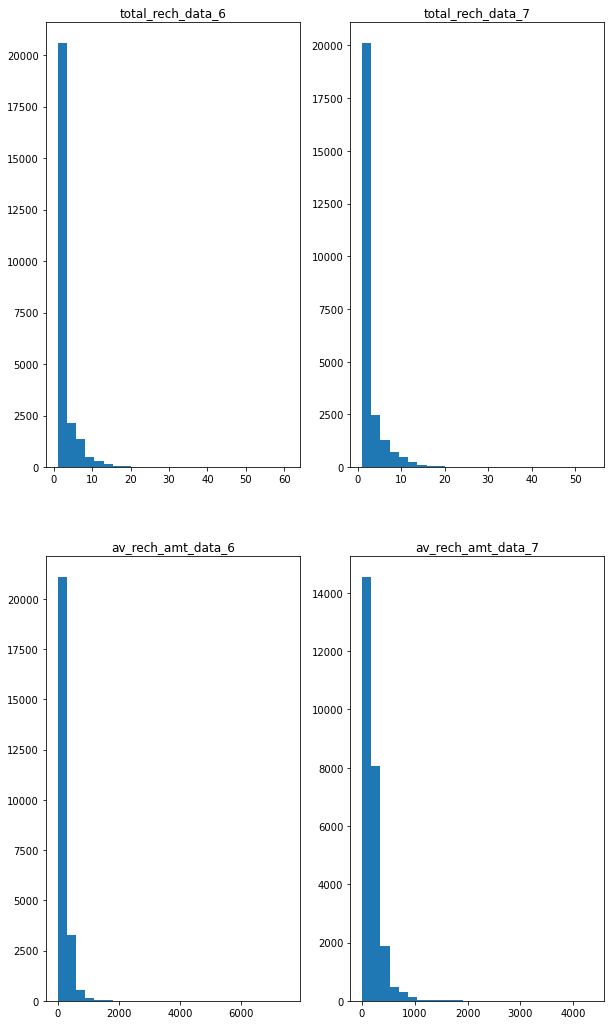

In [17]:
# Plotting distribution plot for better visualization
# total_rech_data_6
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,18))
plt.subplot(2,2,1)
plt.title("total_rech_data_6")
plt.hist(TelecomDF.total_rech_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,2)
plt.title("total_rech_data_7")
plt.hist(TelecomDF.total_rech_data_7.dropna(),bins=25)

# av_rech_amt_data_6
plt.subplot(2,2,3)
plt.title("av_rech_amt_data_6")
plt.hist(TelecomDF.av_rech_amt_data_6.dropna(),bins=25)

# total_rech_data_7
plt.subplot(2,2,4)
plt.title("av_rech_amt_data_7")
plt.hist(TelecomDF.av_rech_amt_data_7.dropna(),bins=25)

In [18]:
# Imputing missing values in above columns with 0 that means no recharge has been done

TelecomDF.total_rech_data_6.fillna(value=0, inplace=True)
TelecomDF.total_rech_data_7.fillna(value=0, inplace=True)
TelecomDF.total_rech_data_8.fillna(value=0, inplace=True)
TelecomDF.total_rech_data_9.fillna(value=0, inplace=True)

TelecomDF.av_rech_amt_data_6.fillna(value=0, inplace=True)
TelecomDF.av_rech_amt_data_7.fillna(value=0, inplace=True)
TelecomDF.av_rech_amt_data_8.fillna(value=0, inplace=True)
TelecomDF.av_rech_amt_data_9.fillna(value=0, inplace=True)

In [19]:
# Checking columns with more than 70% missing values
nullCount = round(100*(TelecomDF.isnull().sum()/len(TelecomDF.index)), 2)
print(nullCount[nullCount >= 70])

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7                   74.43
arpu_2g_8                   73.66
arpu_2g_9                   74.08
dtype: float64


In [20]:
# Dropping columns with more than 70% of missing data
drop_cols_above_70 = nullCount[nullCount > 70].index
TelecomDF.drop(drop_cols_above_70, axis=1, inplace=True)

In [21]:
TelecomDF.shape

(99999, 208)

### Filtering High Valued Customers

In [22]:
TelecomDF["total_rech_6"] = TelecomDF["total_rech_data_6"]*TelecomDF['av_rech_amt_data_6']
TelecomDF["total_rech_7"] = TelecomDF["total_rech_data_7"]*TelecomDF['av_rech_amt_data_7']
TelecomDF["total_rech_8"] = TelecomDF["total_rech_data_8"]*TelecomDF['av_rech_amt_data_8']
TelecomDF["total_rech_9"] = TelecomDF["total_rech_data_9"]*TelecomDF['av_rech_amt_data_9']

# Dropping original recharge columns
drop_list = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
             'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
TelecomDF.drop(drop_list, axis=1, inplace=True)

In [23]:
TelecomDF.shape

(99999, 204)

In [24]:
# Calculating average recharge amount of first two months
avg_rech_6_7 = (TelecomDF["total_rech_amt_6"] + TelecomDF["total_rech_6"] + 
                      TelecomDF["total_rech_amt_7"] + TelecomDF["total_rech_7"]) / 2.0
amount_70_percentile = np.percentile(avg_rech_6_7, 70.0)
amount_70_percentile

TelecomDF = TelecomDF[avg_rech_6_7 >= amount_70_percentile]

In [25]:
TelecomDF.shape

(30001, 204)

In [26]:
# Creating a new column "churn", with  values 1 (churn) or 0 (non-churn)
# Calculating churn/non-churn based on the usage 
TelecomDF['churn'] = np.where(TelecomDF[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
TelecomDF.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_6,total_rech_7,total_rech_8,total_rech_9,churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,-1.0,968,30.40,0.00,101.20,3.58,1,0,1,0,1,0,0,1,0,1,0,1,252.0,252.0,252.0,0.0,1
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74

In [27]:
# Calculating churn/non churn percentage
TelecomDF['churn'].value_counts()/len(TelecomDF)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

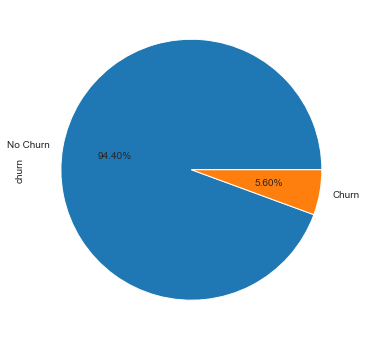

In [148]:
churnDist = TelecomDF['churn'].value_counts()/len(TelecomDF)*100
churnDist.plot.pie(autopct='%.2f%%',labels=['No Churn','Churn'],figsize=(6,6))
plt.show()

The above metrics and pie chart shows that data is highly imbalanced.

In [28]:
# Dropping the columns with ending with _9 i.e. the fourth month columns 
drop_list = [col for col in list(TelecomDF) if col.endswith("_9")]
TelecomDF.drop(drop_list, axis=1, inplace=True)

In [29]:
TelecomDF.shape

(30001, 158)

In [30]:
# Dropping 'sep_vbc_3g' column as this also contains 4th month's (September) data
TelecomDF.drop('sep_vbc_3g', axis=1, inplace=True)
TelecomDF.shape

(30001, 157)

In [31]:
# Checking columns with non unique vales and dropping them

TelecomDF_unique_count = TelecomDF.nunique().sort_values(ascending=False)
TelecomDF_unique_count

mobile_number           30001
arpu_7                  29084
arpu_6                  29072
arpu_8                  28073
total_og_mou_7          23684
total_og_mou_6          23519
total_og_mou_8          22316
offnet_mou_7            21263
offnet_mou_6            21220
offnet_mou_8            20163
total_ic_mou_7          20161
total_ic_mou_6          20121
total_ic_mou_8          19581
loc_ic_mou_6            18524
loc_og_mou_7            18502
loc_ic_mou_7            18496
loc_og_mou_6            18348
loc_ic_mou_8            18069
loc_og_mou_8            17582
onnet_mou_7             16987
onnet_mou_6             16890
std_og_mou_7            15958
std_og_mou_6            15922
onnet_mou_8             15872
loc_og_t2m_mou_7        15674
loc_og_t2m_mou_6        15625
loc_ic_t2m_mou_7        15547
loc_ic_t2m_mou_6        15461
loc_og_t2m_mou_8        15130
loc_ic_t2m_mou_8        15122
std_og_mou_8            14719
std_og_t2m_mou_7        12888
std_og_t2m_mou_6        12875
std_og_t2m

In [32]:
# As we can see that there are uni-valued columns hence these columns could be dropped
# Fetching such columns
TelecomDF_unique_count_1 = TelecomDF_unique_count[TelecomDF_unique_count == 1]
TelecomDF_unique_count_1

last_date_of_month_7    1
circle_id               1
loc_og_t2o_mou          1
std_og_t2o_mou          1
loc_ic_t2o_mou          1
last_date_of_month_6    1
std_ic_t2o_mou_6        1
last_date_of_month_8    1
std_ic_t2o_mou_7        1
std_og_t2c_mou_6        1
std_og_t2c_mou_7        1
std_og_t2c_mou_8        1
std_ic_t2o_mou_8        1
dtype: int64

In [33]:
# Dropping the columns with no variance
drop_nonunique_cols_list = list(TelecomDF_unique_count_1.index)
TelecomDF.drop(drop_nonunique_cols_list, axis=1, inplace=True)
TelecomDF.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_6,total_rech_7,total_rech_8,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,1,0,1,0,1,0,0,1,0,1,0,1,252.0,252.0,252.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1

In [34]:
TelecomDF.shape

(30001, 144)

In [35]:
# Checking if there are rows will all null values
TelecomDF.isnull().all(axis=1).sum()

0

In [36]:
# Checking null values in each row
rows_null = TelecomDF.isnull().sum(axis=1)
rows_null[rows_null > 0]

0        54
77       27
91        1
111      27
188      28
191       1
358      27
364      27
414      28
423      27
527      27
539      54
588       1
603       2
679       1
687      82
690      28
723      28
788      27
845      28
895      27
933      27
934      27
1138     54
1255     27
1374      1
1489     54
1500     55
1524     28
1555     56
1623     27
1754     27
1768     27
1877     27
1913      1
1952     28
2063     27
2185     81
2197     28
2218     55
2285     81
2352     28
2452     27
2516     54
2533     27
2572     27
2719     27
2750     27
2777      1
3154     81
3289     54
3290     81
3310     27
3364     27
3416     27
3444     54
3468     81
3511     27
3523     55
3543     27
3564     27
3667     28
3696     27
3719     27
3734     27
3754     54
3757      1
3854     28
3865     28
3878     27
4190     83
4284      1
4402     27
4414     28
4439     27
4810     28
4814      1
4820     54
4838     81
4934      1
4960     29
4996     27
5025     27
5074

In [37]:
# Dropping rows with null count more than 27
TelecomDF = TelecomDF[TelecomDF.isnull().sum(axis=1) < 27]

In [38]:
TelecomDF.shape

(28504, 144)

In [39]:
# Checking null count again
round(100*(TelecomDF.isnull().sum()/len(TelecomDF.index)), 2)

mobile_number          0.00
arpu_6                 0.00
arpu_7                 0.00
arpu_8                 0.00
onnet_mou_6            0.00
onnet_mou_7            0.00
onnet_mou_8            0.00
offnet_mou_6           0.00
offnet_mou_7           0.00
offnet_mou_8           0.00
roam_ic_mou_6          0.00
roam_ic_mou_7          0.00
roam_ic_mou_8          0.00
roam_og_mou_6          0.00
roam_og_mou_7          0.00
roam_og_mou_8          0.00
loc_og_t2t_mou_6       0.00
loc_og_t2t_mou_7       0.00
loc_og_t2t_mou_8       0.00
loc_og_t2m_mou_6       0.00
loc_og_t2m_mou_7       0.00
loc_og_t2m_mou_8       0.00
loc_og_t2f_mou_6       0.00
loc_og_t2f_mou_7       0.00
loc_og_t2f_mou_8       0.00
loc_og_t2c_mou_6       0.00
loc_og_t2c_mou_7       0.00
loc_og_t2c_mou_8       0.00
loc_og_mou_6           0.00
loc_og_mou_7           0.00
loc_og_mou_8           0.00
std_og_t2t_mou_6       0.00
std_og_t2t_mou_7       0.00
std_og_t2t_mou_8       0.00
std_og_t2m_mou_6       0.00
std_og_t2m_mou_7    

In [40]:
nullDF = round(100*(TelecomDF.isnull().sum()/len(TelecomDF.index)), 2)
nullDF[nullDF > 0]

date_of_last_rech_6    0.12
date_of_last_rech_7    0.18
date_of_last_rech_8    0.97
dtype: float64

In [41]:
# The remaining columns with missing values are date columns. 
# Analysing these columns and fixing each of these as and when required.
date_cols = ["date_of_last_rech_6",  "date_of_last_rech_7", "date_of_last_rech_8"]
TelecomDF[date_cols].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,6/27/2014,7/25/2014,8/26/2014
8,6/25/2014,7/31/2014,8/30/2014
21,6/30/2014,7/31/2014,8/31/2014
23,6/18/2014,7/7/2014,8/24/2014
33,6/30/2014,7/30/2014,8/26/2014


In [42]:
TelecomDF[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date_of_last_rech_6  28471 non-null  object
 1   date_of_last_rech_7  28452 non-null  object
 2   date_of_last_rech_8  28228 non-null  object
dtypes: object(3)
memory usage: 890.8+ KB


In [43]:
# Converting date columns to datetime format
for col in date_cols:
    TelecomDF[col] = pd.to_datetime(TelecomDF[col])

TelecomDF[date_cols].info()
TelecomDF[date_cols].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_of_last_rech_6  28471 non-null  datetime64[ns]
 1   date_of_last_rech_7  28452 non-null  datetime64[ns]
 2   date_of_last_rech_8  28228 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 890.8 KB


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,2014-06-27,2014-07-25,2014-08-26
8,2014-06-25,2014-07-31,2014-08-30
21,2014-06-30,2014-07-31,2014-08-31
23,2014-06-18,2014-07-07,2014-08-24
33,2014-06-30,2014-07-30,2014-08-26


In [44]:
# Now that we have converted the columns into date type, calculating no. of days left for the next recharge
#Last day of June is 30-06-2014
last_date_of_month_6 = datetime.datetime.strptime("30-06-2014", "%d-%m-%Y")
#Last day of July is 31-07-2014
last_date_of_month_7 = datetime.datetime.strptime("31-07-2014", "%d-%m-%Y")
#Last day of August is 31-08-2014
last_date_of_month_8 = datetime.datetime.strptime("31-08-2014", "%d-%m-%Y")

TelecomDF["rech_days_left_6"] = (last_date_of_month_6 - TelecomDF.date_of_last_rech_6).astype('timedelta64[D]')
TelecomDF["rech_days_left_7"] = (last_date_of_month_7 - TelecomDF.date_of_last_rech_7).astype('timedelta64[D]')
TelecomDF["rech_days_left_8"] = (last_date_of_month_8 - TelecomDF.date_of_last_rech_8).astype('timedelta64[D]')

days_cols = ["rech_days_left_6", "rech_days_left_7", "rech_days_left_8"]
days_cols

['rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']

In [45]:
TelecomDF[days_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28504 entries, 7 to 99997
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rech_days_left_6  28471 non-null  float64
 1   rech_days_left_7  28452 non-null  float64
 2   rech_days_left_8  28228 non-null  float64
dtypes: float64(3)
memory usage: 890.8 KB


In [46]:
TelecomDF.shape

(28504, 147)

In [47]:
# Dropping original date columns since we have derived new columns and will be using these for further analysis
TelecomDF.drop(date_cols, axis=1, inplace=True)

In [48]:
TelecomDF.shape

(28504, 144)

In [49]:
TelecomDF[['rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']].describe()

,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,28471.000000,28452.000000,28228.000000
mean,3.388044,3.486504,4.147478
std,4.490864,4.289200,5.104752
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,2.000000,2.000000,3.000000
75%,4.000000,5.000000,6.000000
max,29.000000,30.000000,30.000000


In [50]:
# Imputing above columns with median 
TelecomDF.loc[np.isnan(TelecomDF['rech_days_left_6']), ['rech_days_left_6']] = TelecomDF['rech_days_left_6'].median()
TelecomDF.loc[np.isnan(TelecomDF['rech_days_left_7']), ['rech_days_left_7']] = TelecomDF['rech_days_left_7'].median()
TelecomDF.loc[np.isnan(TelecomDF['rech_days_left_8']), ['rech_days_left_8']] = TelecomDF['rech_days_left_8'].median()

round(100*(TelecomDF.isnull().sum()/len(TelecomDF.index)), 2)

mobile_number         0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_mou_6          0.0
loc_og_mou_7          0.0
loc_og_mou_8          0.0
std_og_t2t_mou_6      0.0
std_og_t2t_mou_7      0.0
std_og_t2t_mou_8      0.0
std_og_t2m_mou_6      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_8      0.0
std_og_t2f_mou_6      0.0
std_og_t2f_m

In [51]:
TelecomDF.shape

(28504, 144)

### Outlier Treatment

In [52]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
TelecomDF.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,night6_0.0,night6_1.0,night7_0.0,night7_1.0,night8_0.0,night8_1.0,fb6_0.0,fb6_1.0,fb7_0.0,fb7_1.0,fb8_0.0,fb8_1.0,total_rech_6,total_rech_7,total_rech_8,churn,rech_days_left_6,rech_days_left_7,rech_days_left_8
count,2.850400e+04,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.00000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000,28504.000000
mean,7.001214e+09,560.375015,570.628779,526.058843,265.250016,275.933639,244.727998,379.885653,389.853704,350.226224,1

In [53]:
# Checking Churn/non-churn count
churn  = TelecomDF["churn"].value_counts()
churn_rate = churn[1]/(churn[1] + churn[0])
print("Churn count:", churn[1])
print("Non Churn count:", churn[0])
print("Churn Rate: {:.2f}%".format(churn_rate*100))

Churn count: 1596
Non Churn count: 26908
Churn Rate: 5.60%


In [54]:
# Performing univariate analysis
Churn_data = TelecomDF[TelecomDF["churn"] == 1]
Not_Churn_data = TelecomDF[TelecomDF["churn"] == 0]

#### Univariate Analysis on columns 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8'

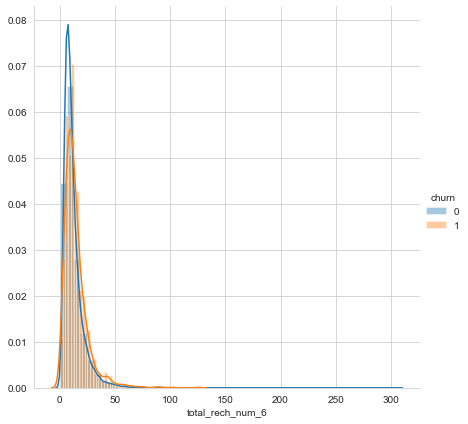

In [55]:
# Visualising 'total_rech_num_6'
sns.set_style('whitegrid')
sns.FacetGrid(TelecomDF,hue='churn',size=6).map(sns.distplot,"total_rech_num_6").add_legend()

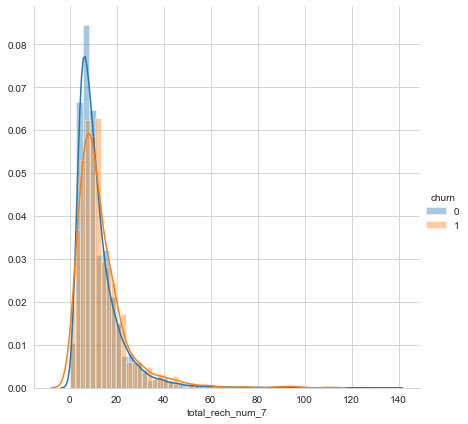

In [56]:
# Visualising 'total_rech_num_7'
sns.set_style('whitegrid')
sns.FacetGrid(TelecomDF,hue='churn',size=6).map(sns.distplot,"total_rech_num_7").add_legend()

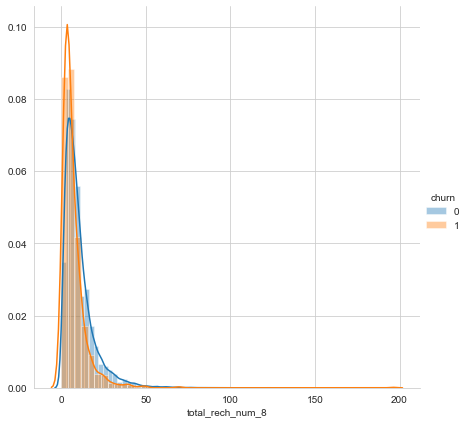

In [57]:
# Visualising 'total_rech_num_8'
sns.set_style('whitegrid')
sns.FacetGrid(TelecomDF,hue='churn',size=6).map(sns.distplot,"total_rech_num_8").add_legend()

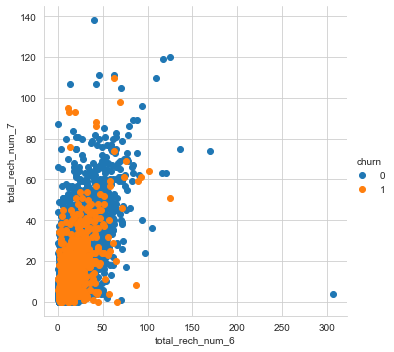

In [58]:
# Visualising 'total_rech_num_6',total_rech_num_7'
sns.FacetGrid(TelecomDF,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_7").add_legend()

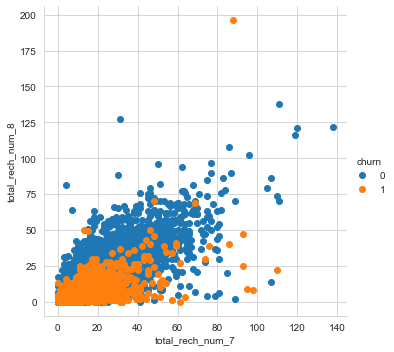

In [59]:
# Visualising 'total_rech_num_7',total_rech_num_8'
sns.FacetGrid(TelecomDF,hue='churn',size=5).map(plt.scatter,"total_rech_num_7","total_rech_num_8").add_legend()

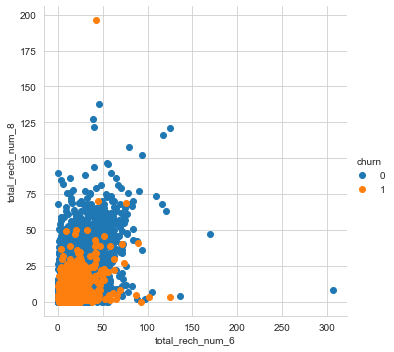

In [60]:
# Visualising 'total_rech_num_6',total_rech_num_8'
sns.FacetGrid(TelecomDF,hue='churn',size=5).map(plt.scatter,"total_rech_num_6","total_rech_num_8").add_legend()

#### Univariate Analysis on 'total_rech_6', 'total_rech_7', 'total_rech_8'

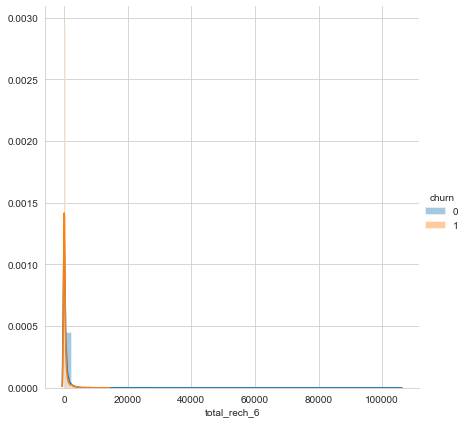

In [61]:
# Visualising 'total_rech_6'
sns.FacetGrid(TelecomDF,hue='churn',size=6).map(sns.distplot,"total_rech_6").add_legend()

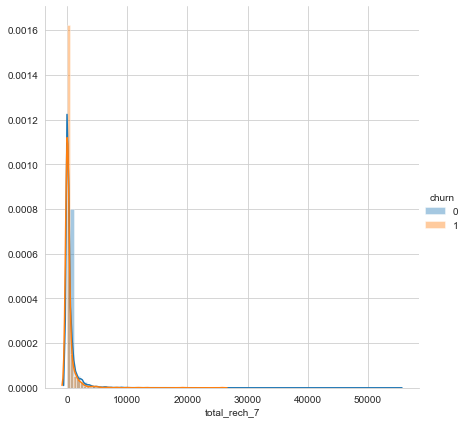

In [62]:
# Visualising 'total_rech_7'
sns.FacetGrid(TelecomDF,hue='churn',size=6).map(sns.distplot,"total_rech_7").add_legend()

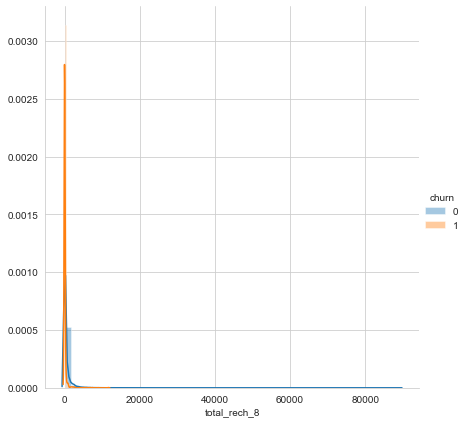

In [63]:
# Visualising 'total_rech_8'
sns.FacetGrid(TelecomDF,hue='churn',size=6).map(sns.distplot,"total_rech_8").add_legend()

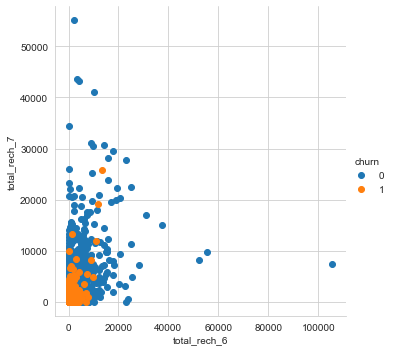

In [64]:
# Visualising 'total_rech_6' and total_rech_7'
sns.FacetGrid(TelecomDF,hue='churn',size=5).map(plt.scatter,"total_rech_6","total_rech_7").add_legend()

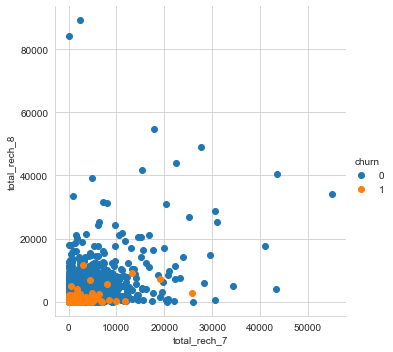

In [65]:
# Visualising 'total_rech_7' and total_rech_8'
sns.FacetGrid(TelecomDF,hue='churn',size=5).map(plt.scatter,"total_rech_7","total_rech_8").add_legend()

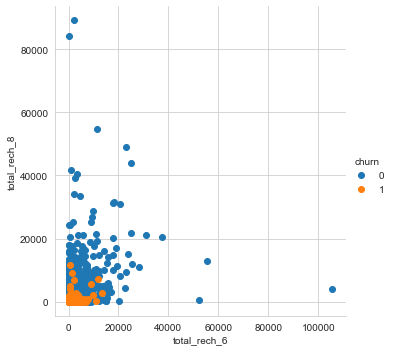

In [66]:
# Visualising 'total_rech_6' and total_rech_8'
sns.FacetGrid(TelecomDF,hue='churn',size=5).map(plt.scatter,"total_rech_6","total_rech_8").add_legend()

#### Univariate Analysis on max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'

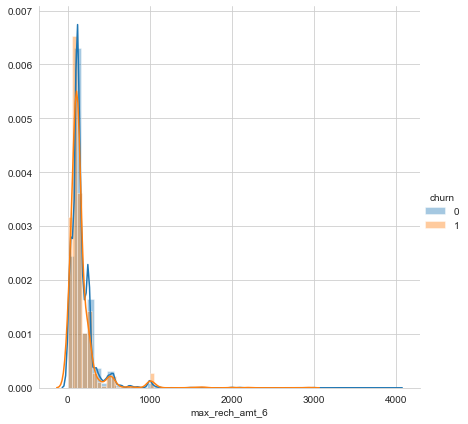

In [67]:
# Visualising max_rech_amt_6'
sns.FacetGrid(TelecomDF,hue='churn',size=6).map(sns.distplot,"max_rech_amt_6").add_legend()

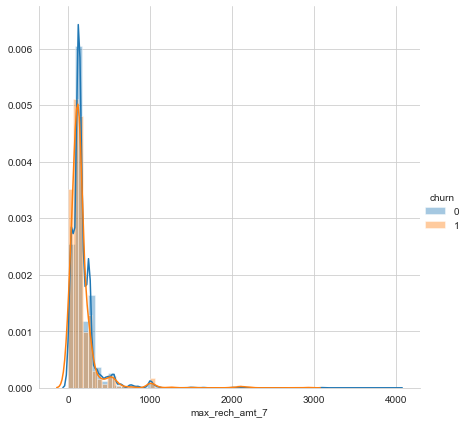

In [68]:
# Visualising max_rech_amt_7'
sns.FacetGrid(TelecomDF,hue='churn',size=6).map(sns.distplot,"max_rech_amt_7").add_legend()

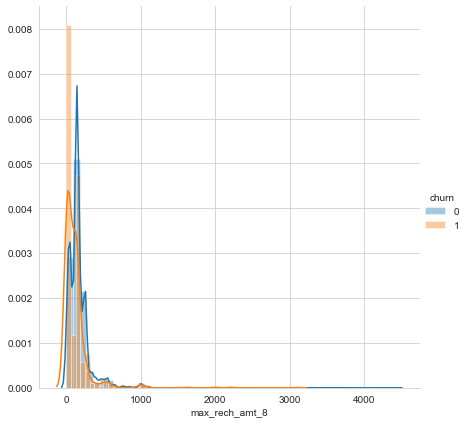

In [69]:
# Visualising max_rech_amt_8'
sns.FacetGrid(TelecomDF,hue='churn',size=6).map(sns.distplot,"max_rech_amt_8").add_legend()

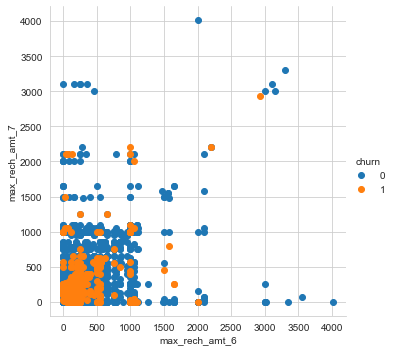

In [70]:
# Visualising max_rech_amt_6' and 'max_rech_amt_7'
sns.FacetGrid(TelecomDF,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_7").add_legend()

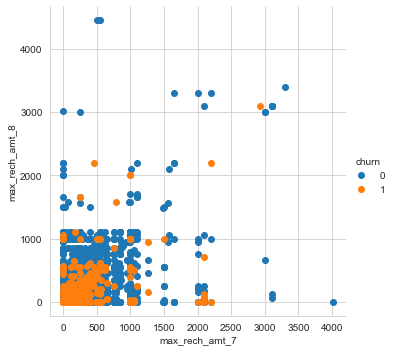

In [71]:
# Visualising max_rech_amt_7' and 'max_rech_amt_8'
sns.FacetGrid(TelecomDF,hue='churn',size=5).map(plt.scatter,"max_rech_amt_7","max_rech_amt_8").add_legend()

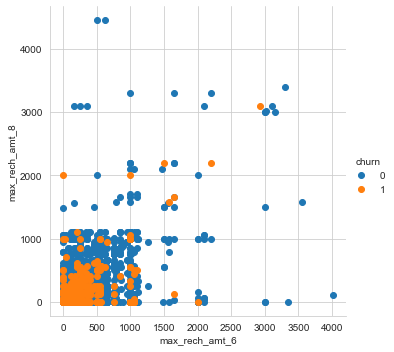

In [72]:
# Visualising max_rech_amt_6' and 'max_rech_amt_8'
sns.FacetGrid(TelecomDF,hue='churn',size=5).map(plt.scatter,"max_rech_amt_6","max_rech_amt_8").add_legend()

<AxesSubplot:>

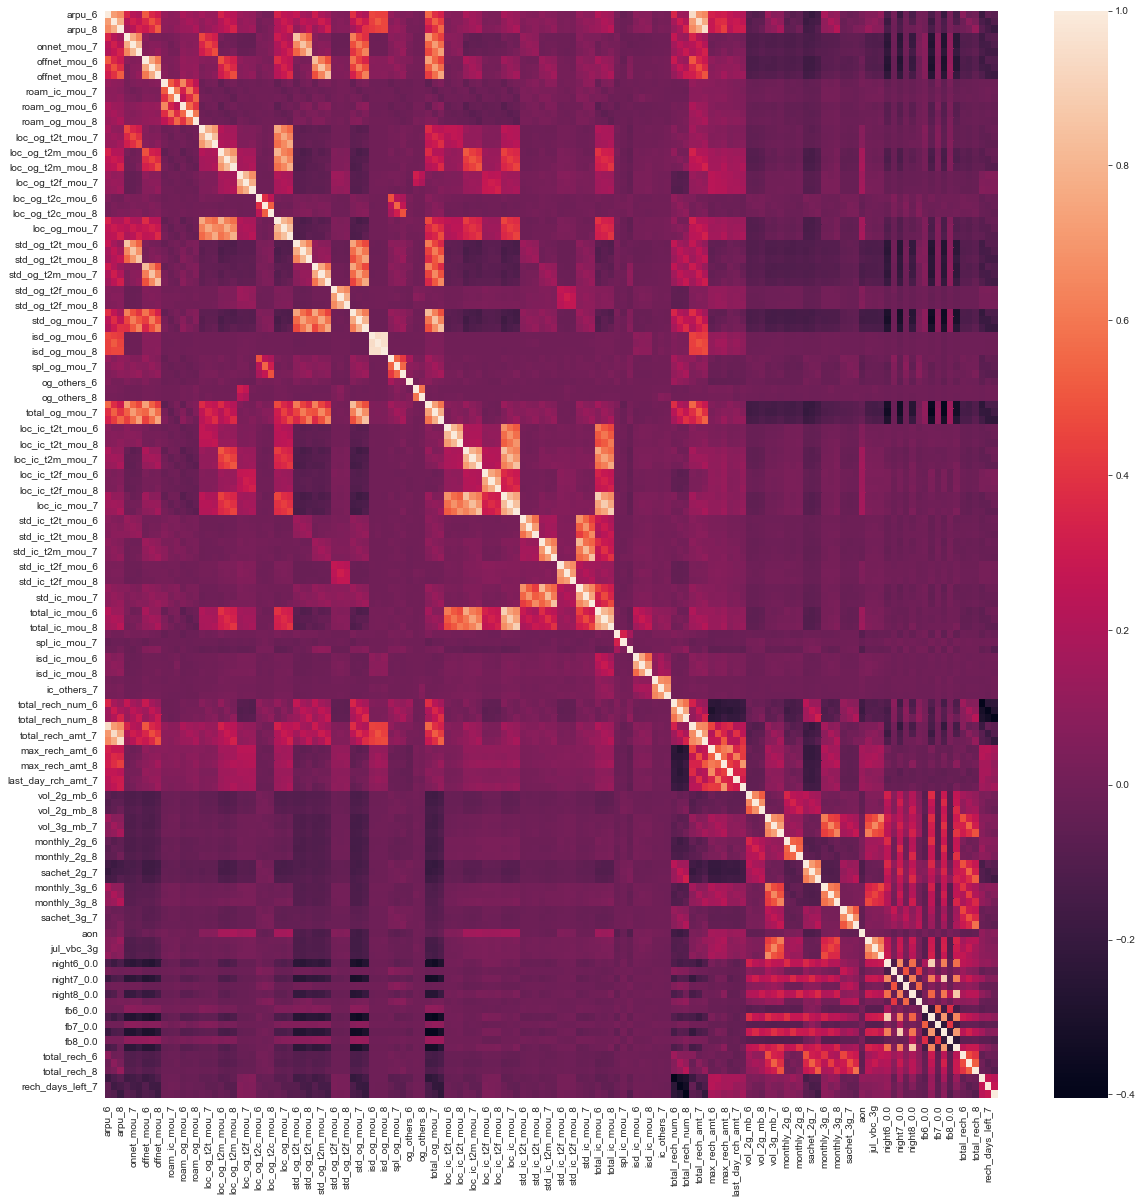

In [73]:
# Bivariate Analysis
TelecomDF_New = TelecomDF.drop(['mobile_number', 'churn'], axis=1)

# Plotting correlation matrix 
plt.figure(figsize = (20,20))        
sns.heatmap(TelecomDF_New.corr())

The correlation map shows that some of the features are highly correlated. Instead of dropping those features we will proceed with PCA.

### Model Building using PCA

In [74]:
# Dropping mobile number and creating a new dataframe
TelecomDF_1 = TelecomDF.drop(['mobile_number'], axis=1)
# Dropping churn and creating a new dataframe
TelecomDF_2 = TelecomDF_1.drop(['churn'], axis=1)
# Creating X (independent variable) & y (dependent variable) 
X = TelecomDF_1.drop(['churn'], axis=1)
y = TelecomDF_1['churn']

In [75]:
# Data Scaling
scaler = preprocessing.StandardScaler().fit(X)
Xscaled = scaler.transform(X)

In [76]:
# Test - Train split
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, train_size=0.7,random_state=42)

In [77]:
print(X_train.shape)
print(X_test.shape)

(19952, 142)
(8552, 142)


In [78]:
print("X_train Shape {}".format(X_train.shape))
print("X_test Shape {}".format(X_test.shape))
y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Dataset: {}".format(y_train_imb))
print("Imbalance in Test Dataset: {}".format(y_test_imb))

X_train Shape (19952, 142)
X_test Shape (8552, 142)
Imbalance in Train Dataset: 0.0613895095222896
Imbalance in Test Dataset: 0.054500616522811345


Applying SMOTE for handling imbalanced data:

In [79]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)
np.count_nonzero(y_tr)

(37596, 142)
(37596,)


18798

In [80]:
print("X_tr Shape {}".format(X_tr.shape))
print("y_tr Shape {}".format(y_tr.shape))
data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Dataset: {}".format(data_imbalance))

X_tr Shape (37596, 142)
y_tr Shape (37596,)
Imbalance in Train Dataset: 1.0


In [81]:
pca = PCA(random_state=100)

# Performing PCA on the train dataset
pca.fit(X_tr)

PCA(random_state=100)

In [82]:
train_pca = pca.fit_transform(X_tr)
test_pca = pca.transform(X_test)

In [83]:
print(train_pca.shape)
print(test_pca.shape)

(37596, 142)
(8552, 142)


In [84]:
# Applying Logistic Regression
log_reg = LogisticRegression(C=1e9)
log_reg.fit(train_pca, y_tr)

# Predicted variable
y_pred = log_reg.predict(test_pca)
# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_pred)

In [160]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[6518 1557]
 [  93  384]]


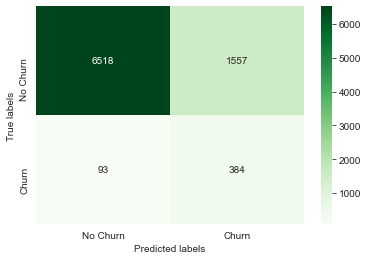

In [161]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'],cmap='Greens')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

In [86]:
print("Accuracy with PCA: ",accuracy_score(y_test,y_pred))

Accuracy with PCA:  0.823666978484565


#### Accuracy with PCA is 82%. 

In [87]:
pca.components_

array([[ 1.50727546e-01,  1.48640730e-01,  9.98844538e-02, ...,
        -7.16708465e-02, -5.50943305e-02, -3.16081169e-02],
       [ 8.45194918e-02,  1.09454078e-01,  1.46444818e-01, ...,
         3.02147679e-02, -1.64774367e-03, -8.01456698e-03],
       [ 4.65291293e-02,  2.88217513e-02,  3.02722465e-02, ...,
         2.70641790e-02,  4.76821963e-02,  1.27344687e-02],
       ...,
       [ 0.00000000e+00,  4.25841457e-17,  2.27821663e-16, ...,
        -2.56554832e-18,  3.35304764e-17,  4.43394934e-17],
       [ 2.57944641e-16, -1.68037288e-16,  1.91332371e-17, ...,
         1.23819873e-17,  3.90558128e-18, -4.27658461e-18],
       [-0.00000000e+00,  1.32137879e-16, -1.28200289e-16, ...,
        -5.97265408e-18,  2.53702179e-17,  5.29088578e-17]])

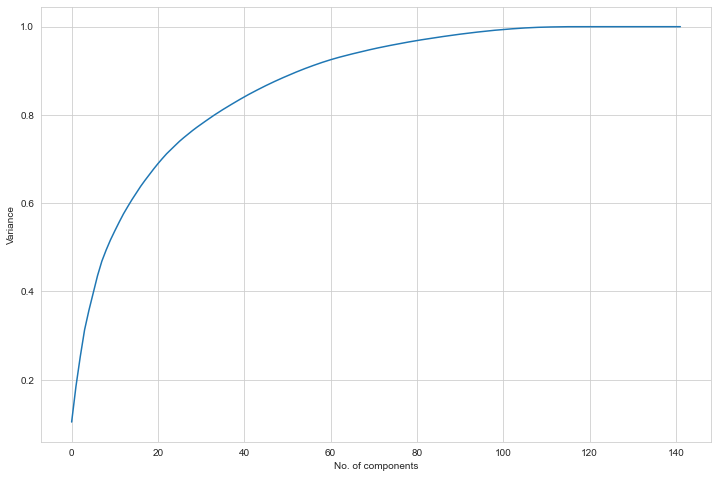

In [88]:
# Plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of components')
plt.ylabel('Variance')
plt.show()

In [89]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 10.42,  18.49,  25.25,  31.33,  35.73,  39.71,  43.6 ,  46.88,
        49.42,  51.71,  53.75,  55.71,  57.59,  59.26,  60.87,  62.38,
        63.86,  65.21,  66.5 ,  67.78,  68.99,  70.13,  71.22,  72.18,
        73.12,  74.06,  74.9 ,  75.7 ,  76.49,  77.23,  77.93,  78.62,
        79.3 ,  79.97,  80.6 ,  81.22,  81.82,  82.41,  82.99,  83.56,
        84.11,  84.66,  85.18,  85.69,  86.19,  86.68,  87.15,  87.61,
        88.06,  88.49,  88.92,  89.34,  89.75,  90.15,  90.53,  90.9 ,
        91.25,  91.6 ,  91.93,  92.25,  92.55,  92.84,  93.11,  93.37,
        93.62,  93.87,  94.11,  94.35,  94.58,  94.81,  95.03,  95.24,
        95.45,  95.65,  95.84,  96.03,  96.22,  96.4 ,  96.58,  96.75,
        96.92,  97.08,  97.23,  97.38,  97.53,  97.68,  97.82,  97.96,
        98.1 ,  98.23,  98.36,  98.48,  98.6 ,  98.72,  98.83,  98.94,
        99.04,  99.14,  99.24,  99.33,  99.41,  99.49,  99.57,  99.64,
        99.71,  99.77,  99.82,  99.86,  99.9 ,  99.93,  99.95,  99.97,
      

In [90]:
# Performing PCA with 48 columns
pca48 = PCA(n_components=48)

In [91]:
train_pca48 = pca48.fit_transform(X_tr)
print(train_pca48.shape)
test_pca48 = pca48.transform(X_test)
print(test_pca48.shape)

(37596, 48)
(8552, 48)


In [92]:
# Logistic regression with 48 columns
log_reg_pca = LogisticRegression(C=1e9)
log_reg_pca.fit(train_pca48, y_tr)

# Predicted variables
y_pred48 = log_reg_pca.predict(test_pca48)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred48)

In [164]:
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred48))

[[6359 1716]
 [ 379   98]]


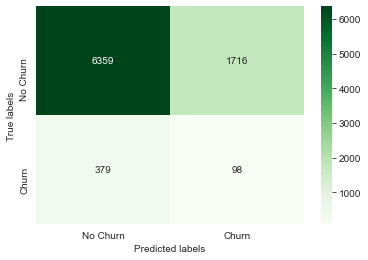

In [163]:
cm = confusion_matrix(y_test,y_pred48)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'],cmap='Greens')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

In [94]:
print("Accuracy: ",accuracy_score(y_test,y_pred48))

Accuracy:  0.8206267539756782


#### Accuracy using PCA with 48 columns is 82%. We will proceed with creation of other models with more accuracy.

### Model Building using RFE

In [95]:
# Data Scaling
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [96]:
X.shape

(28504, 142)

In [97]:
# Splitting into train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [98]:
print("X_train Shape {}".format(X_train.shape))
print("X_test Shape {}".format(X_test.shape))
y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Dataset: {}".format(y_train_imb))
print("Imbalance in Test Dataset: {}".format(y_test_imb))

X_train Shape (19952, 142)
X_test Shape (8552, 142)
Imbalance in Train Dataset: 0.05941698083151914
Imbalance in Test Dataset: 0.059071207430340555


In [99]:
# Balancing dataset by oversampling
sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)

In [100]:
print("X_tr Shape {}".format(X_tr.shape))
print("y_tr Shape {}".format(y_tr.shape))
data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Dataset: {}".format(data_imbalance))

X_tr Shape (37666, 142)
y_tr Shape (37666,)
Imbalance in Train Dataset: 1.0


In [101]:
# Feature reduction using RFE
logreg = LogisticRegression()

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)   
rfe = rfe.fit(X_tr, y_tr)

In [102]:
rfe_features = list(TelecomDF_2.columns[rfe.support_])
print("Features identified by RFE: ", rfe_features)

Features identified by RFE:  ['arpu_8', 'onnet_mou_7', 'std_og_t2m_mou_7', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'rech_days_left_8']


In [103]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

In [104]:
#Logistic Regression Model
classifier = LogisticRegression(random_state=1)
classifier.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [105]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
y_pred = classifier.predict(X_test_rfe)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[6518, 1557],
       [  93,  384]], dtype=int64)

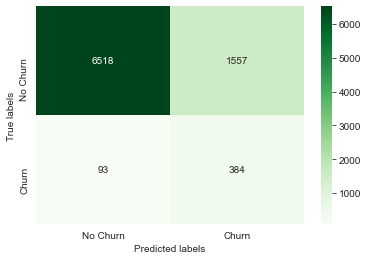

In [165]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'],cmap='Greens')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

In [106]:
print('Accuracy: {:.2f}'.format(classifier.score(X_test_rfe, y_test)))

Accuracy: 0.81


#### Accuracy using RFE is 81%. Next step is to create model with Random Forest.

In [107]:
# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      8075
           1       0.20      0.81      0.32       477

    accuracy                           0.81      8552
   macro avg       0.59      0.81      0.60      8552
weighted avg       0.94      0.81      0.86      8552



In [108]:
# Printing confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[6518 1557]
 [  93  384]]


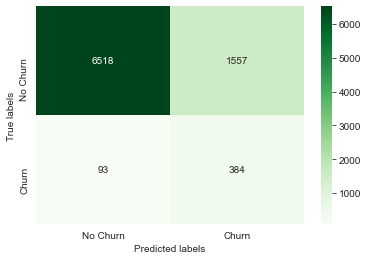

In [166]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'],cmap='Greens')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

### Model building with Random Forest

In [109]:
# Data standardisation
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [110]:
# Splitting train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [111]:
print("X_train Shape {}".format(X_train.shape))
print("X_test Shape {}".format(X_test.shape))
y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Dataset: {}".format(y_train_imb))
print("Imbalance in Test Dataset: {}".format(y_test_imb))

X_train Shape (19952, 142)
X_test Shape (8552, 142)
Imbalance in Train Dataset: 0.05941698083151914
Imbalance in Test Dataset: 0.059071207430340555


In [112]:
sm = SMOTE()
X_tr,y_tr = sm.fit_resample(X_train,y_train)

In [113]:
print("X_tr Shape {}".format(X_tr.shape))
print("y_tr Shape {}".format(y_tr.shape))
data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (37666, 142)
y_tr Dataframe Shape (37666,)
Imbalance in Train Data: 1.0


#### Feature reduction using LASSO

In [114]:
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
position = model.get_support(indices=True)
print(X_lasso.shape)
print(position)

(37666, 45)
[  0   1   3  10  13  14  20  23  29  34  39  40  47  49  52  53  58  65
  75  78  79  80  83  91  92 101 102 104 107 108 109 110 111 113 116 118
 120 121 125 128 132 135 139 140 141]


In [115]:
# Feature selection 
lasso_features = list(TelecomDF_2.columns[position])
print("Features identified by LASSO for model buidling: ", lasso_features)

Features identified by LASSO for model buidling:  ['arpu_6', 'arpu_7', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'spl_og_mou_8', 'og_others_7', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_6', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_7', 'aon', 'aug_vbc_3g', 'night6_1.0', 'night8_0.0', 'fb7_0.0', 'fb8_1.0', 'rech_days_left_6', 'rech_days_left_7', 'rech_days_left_8']


In [116]:
X_train = X_lasso
y_train = y_tr

In [117]:
print ("Feature space holds %d observations and %d features" % X_train.shape)

Feature space holds 37666 observations and 45 features


In [118]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [119]:
# Fitting the model
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [120]:
# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
predictions = rfc.predict(X_test)

In [121]:
# Checking report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8075
           1       0.49      0.54      0.52       477

    accuracy                           0.94      8552
   macro avg       0.73      0.76      0.74      8552
weighted avg       0.95      0.94      0.94      8552



In [122]:
# Printing confusion matrix
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[7809,  266],
       [ 218,  259]], dtype=int64)

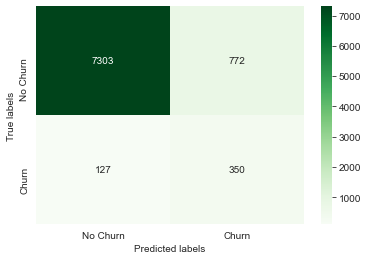

In [167]:
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'],cmap='Greens')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

In [123]:
# Printing Accuracy score
print(accuracy_score(y_test, predictions))

0.9434050514499532


Accuracy of Random forest model with default parameters is around 94%. We don't our model to overfit hence our next step would be hyperparameters tuning.

#### Hyperparameter tuning
#### Please note that due to hyperparameter tuning code run time has increased and below steps might take long time to compute and produce results.

#### Tuning max_depth

In [124]:
parameters = {'max_depth': range(2, 20, 5)}
rf = RandomForestClassifier()
n_folds = 5
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [125]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.812157,0.068357,0.098598,0.000510,2,{'max_depth': 2},0.840988,0.847206,0.858357,0.830346,0.840834,0.843546,0.009175,4,0.856465,0.846647,0.850961,0.829522,0.837056,0.844130,0.009681
1,10.602830,0.216362,0.153325,0.027575,7,{'max_depth': 7},0.897266,0.919819,0.930572,0.924067,0.924598,0.919265,0.011521,3,0.933559,0.925597,0.925132,0.926128,0.923738,0.926831,0.003457
2,15.007865,0.143425,0.187338,0.004486,12,{'max_depth': 12},0.937616,0.957786,0.968007,0.964556,0.964821,0.958557,0.010988,2,0.982311,0.980287,0.979159,0.979159,0.979259,0.980035,0.001215
3,17.564265,0.053366,0.215892,0.005876,17,{'max_depth': 17},0.945846,0.969202,0.975441,0.972919,0.975574,0.967796,0.011216,1,0.992135,0.992334,0.991969,0.991903,0.991670,0.992002,0.000223


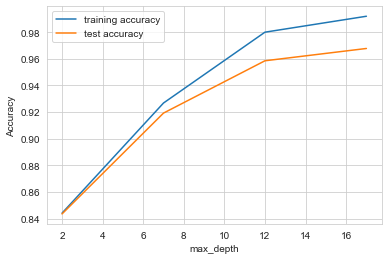

In [126]:
# Plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning n_estimators

In [127]:
# Parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
rf = RandomForestClassifier(max_depth=4)
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [128]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.782362,0.183778,0.118905,0.027452,100,{'n_estimators': 100},0.857977,0.875747,0.884243,0.879198,0.877871,0.875007,0.008962,4,0.878335,0.876282,0.876514,0.879567,0.875950,0.877330,0.001392
1,33.390415,0.188374,0.559491,0.042896,500,{'n_estimators': 500},0.863419,0.878800,0.884774,0.878933,0.879729,0.877131,0.007200,2,0.884940,0.880032,0.875419,0.878074,0.877178,0.879128,0.003264
2,59.900319,0.809873,0.932747,0.028493,900,{'n_estimators': 900},0.864746,0.879065,0.884906,0.879198,0.880127,0.877609,0.006778,1,0.884176,0.879003,0.876348,0.878306,0.877775,0.879122,0.002673
3,86.795554,1.527086,1.363328,0.027220,1300,{'n_estimators': 1300},0.863021,0.877472,0.885437,0.879862,0.878800,0.876919,0.007460,3,0.884010,0.879235,0.875917,0.878074,0.877808,0.879009,0.002718


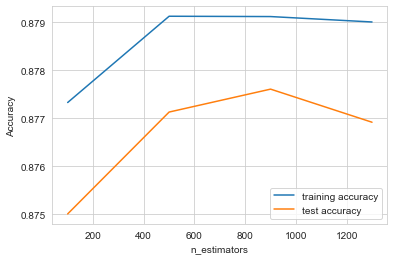

In [129]:
# Plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_n_estimators"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning max_features

In [130]:
# Parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24,28,32,36,40,44,48,52,56]}
rf = RandomForestClassifier(max_depth=4)
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [4, 8, 14, 20, 24, 28, 32, 36, 40, 44,
                                          48, 52, 56]},
             return_train_score=True, scoring='accuracy')

In [131]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.800608,0.089892,0.115753,0.012062,4,{'max_features': 4},0.858375,0.874552,0.880127,0.879198,0.872826,0.873016,0.007817,9,0.879762,0.873760,0.870341,0.875884,0.870872,0.874124,0.003461
1,8.580510,0.106513,0.114024,0.008763,8,{'max_features': 8},0.868065,0.879331,0.884375,0.880791,0.875216,0.877556,0.005580,7,0.890117,0.879202,0.876348,0.879401,0.875054,0.880024,0.005313
2,15.988938,1.209683,0.132272,0.014056,14,{'max_features': 14},0.869790,0.881455,0.898845,0.881322,0.883313,0.882945,0.009283,5,0.892473,0.884213,0.885640,0.883616,0.880530,0.885294,0.003958
3,20.865899,0.349241,0.115290,0.003546,20,{'max_features': 20},0.868463,0.888623,0.900571,0.888491,0.890349,0.887299,0.010425,4,0.896190,0.890286,0.889921,0.890021,0.887266,0.890737,0.002938
4,25.674217,1.850989,0.115833,0.005030,24,{'max_features': 24},0.868198,0.889154,0.900173,0.889420,0.894995,0.888388,0.010880,3,0.895792,0.890253,0.888461,0.890253,0.891016,0.891155,0.002466


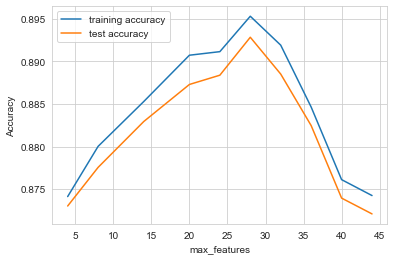

In [132]:
# Plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_features"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning min_samples_leaf

In [133]:
# Parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf = RandomForestClassifier()
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [134]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.979938,0.243317,0.207571,0.047998,100,{'min_samples_leaf': 100},0.889036,0.913315,0.925528,0.920881,0.921412,0.914035,0.013106,1,0.927618,0.916703,0.917599,0.921017,0.917167,0.920021,0.004092
1,12.284934,0.686446,0.165755,0.009961,150,{'min_samples_leaf': 150},0.883329,0.908801,0.913447,0.912120,0.910394,0.905618,0.011255,2,0.917563,0.909734,0.907278,0.910430,0.907543,0.910510,0.003731
2,11.449096,0.276967,0.174961,0.026632,200,{'min_samples_leaf': 200},0.878551,0.899111,0.910660,0.905350,0.905881,0.899910,0.011293,3,0.910195,0.902831,0.902399,0.901537,0.901636,0.903720,0.003273
3,10.808274,0.302169,0.151668,0.008509,250,{'min_samples_leaf': 250},0.877091,0.897916,0.905748,0.898712,0.902695,0.896432,0.010075,4,0.905582,0.899379,0.897820,0.897090,0.898882,0.899750,0.003024
4,10.485258,0.193205,0.149022,0.008800,300,{'min_samples_leaf': 300},0.875498,0.891146,0.900173,0.896987,0.897783,0.892317,0.008918,5,0.903226,0.893871,0.891050,0.894833,0.894700,0.895536,0.004080


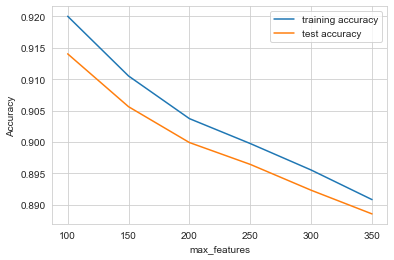

In [135]:
# Plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning min_samples_split

In [136]:
parameters = {'min_samples_split': range(200, 500, 50)}
rf = RandomForestClassifier()
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [137]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,17.394894,0.402854,0.189310,0.007066,200,{'min_samples_split': 200},0.902177,0.931767,0.941989,0.936015,0.938935,0.930176,0.014400,1,0.949522,0.939667,0.939170,0.939269,0.938871,0.941300,0.004119
1,17.081657,0.245178,0.199606,0.015322,250,{'min_samples_split': 250},0.899124,0.928979,0.940661,0.932696,0.935484,0.927389,0.014637,2,0.944212,0.935221,0.934324,0.935818,0.934988,0.936913,0.003681
2,16.532509,0.203995,0.208929,0.033213,300,{'min_samples_split': 300},0.895407,0.926191,0.936280,0.930970,0.931236,0.924017,0.014657,3,0.938736,0.932665,0.929347,0.931072,0.929579,0.932280,0.003441
3,16.513767,0.198644,0.186052,0.005242,350,{'min_samples_split': 350},0.895938,0.921014,0.932563,0.925926,0.926191,0.920327,0.012734,4,0.936280,0.926924,0.925397,0.925198,0.924667,0.927693,0.004358
4,16.119237,0.548201,0.184882,0.016584,400,{'min_samples_split': 400},0.889435,0.921545,0.929245,0.922342,0.927652,0.918044,0.014608,5,0.931269,0.925696,0.923439,0.922610,0.924568,0.925516,0.003059


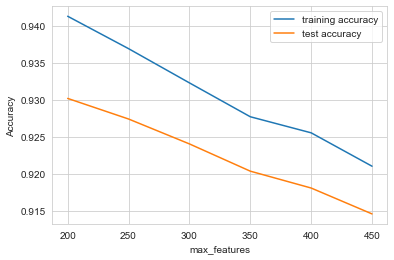

In [138]:
# Plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Grid search to find optimal parameters

In [139]:
# Creating the parameter grid based on the results of random search 
param_grid = {
     'max_depth': [3,4,5],
     'min_samples_leaf': [95, 100, 105],
     'min_samples_split': [55, 60, 65],
     'n_estimators': [245,250, 255],
     'max_features': [20,30,35]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1)

In [140]:
# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'max_features': [20, 30, 35],
                         'min_samples_leaf': [95, 100, 105],
                         'min_samples_split': [55, 60, 65],
                         'n_estimators': [245, 250, 255]},
             verbose=1)

In [141]:
# Printing the optimal accuracy score and hyperparameters
print('Accuracy: ',grid_search.best_score_,'Hyperparameters: ',grid_search.best_params_)

Accuracy:  0.9007861787026327 Hyperparameters:  {'max_depth': 5, 'max_features': 30, 'min_samples_leaf': 100, 'min_samples_split': 55, 'n_estimators': 250}


In [142]:
# Model with the optimal hyperparameters
rfc = RandomForestClassifier(bootstrap=True,
                              max_depth=4,
                              min_samples_leaf=100, 
                              min_samples_split=200,
                              max_features=5,
                              n_estimators=250)
                            

In [143]:
# Fitting the model
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=100,
                       min_samples_split=200)

In [144]:
# Making predictions
predictions = rfc.predict(X_test)

In [155]:
# Printing Classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8075
           1       0.31      0.73      0.44       477

    accuracy                           0.89      8552
   macro avg       0.65      0.82      0.69      8552
weighted avg       0.95      0.89      0.91      8552



In [149]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[7303,  772],
       [ 127,  350]], dtype=int64)

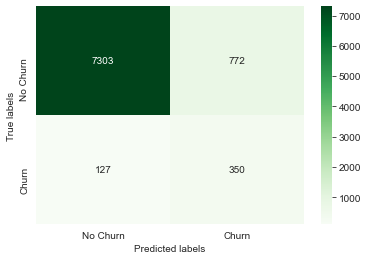

In [156]:
sns.heatmap(confusion_matrix,annot=True,fmt='d',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'],cmap='Greens')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

In [146]:
# Accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, predictions))

Accuracy Score for Random Forest Final Model : 0.8948783910196445


Accuracy of Random forest model with hyperparameters is around 89% - 90% which seem to be optimal.

### Conclusion

1. Accuracy of our final model using Random Forest with hyperparameters tuning is around 89% which is better than previously built models and also the model does not seem to overfit.
2. Consfusion matrix has improved as compared to the previous models.
3. The top features which are the main indicators of churn are: 'arpu_6', 'arpu_7', 'onnet_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2m_mou_7'